In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [4]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [5]:
all_data = train_data + test_data

In [25]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [26]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went'}

In [27]:
vocab.add('no')

In [28]:
vocab.add('yes')

In [55]:
vocab_size = len(vocab) + 1

In [30]:
all_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [31]:
all_story_lens  = [len(data[0]) for data in all_data]

In [32]:
max_story_len = max(all_story_lens)

In [33]:
max_question_len = max([len(data[1]) for data in all_data])

In [34]:
max_question_len

6

In [35]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [36]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [37]:
tokenizer.word_index

{'dropped': 1,
 'went': 2,
 'picked': 3,
 'up': 4,
 'grabbed': 5,
 'yes': 6,
 'mary': 7,
 'hallway': 8,
 'back': 9,
 'left': 10,
 'journeyed': 11,
 'bedroom': 12,
 'in': 13,
 'there': 14,
 '.': 15,
 'no': 16,
 'is': 17,
 'bathroom': 18,
 'travelled': 19,
 'moved': 20,
 'the': 21,
 'john': 22,
 'sandra': 23,
 'garden': 24,
 'daniel': 25,
 'kitchen': 26,
 '?': 27,
 'got': 28,
 'took': 29,
 'football': 30,
 'milk': 31,
 'put': 32,
 'discarded': 33,
 'down': 34,
 'to': 35,
 'office': 36,
 'apple': 37}

In [39]:
train_story_text = []
train_question_text = []
train_answers = []

In [40]:
for story, question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [42]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [43]:
train_story_seq

[[7, 20, 35, 21, 18, 15, 23, 11, 35, 21, 12, 15],
 [7,
  20,
  35,
  21,
  18,
  15,
  23,
  11,
  35,
  21,
  12,
  15,
  7,
  2,
  9,
  35,
  21,
  12,
  15,
  25,
  2,
  9,
  35,
  21,
  8,
  15],
 [7,
  20,
  35,
  21,
  18,
  15,
  23,
  11,
  35,
  21,
  12,
  15,
  7,
  2,
  9,
  35,
  21,
  12,
  15,
  25,
  2,
  9,
  35,
  21,
  8,
  15,
  23,
  2,
  35,
  21,
  26,
  15,
  25,
  2,
  9,
  35,
  21,
  18,
  15],
 [7,
  20,
  35,
  21,
  18,
  15,
  23,
  11,
  35,
  21,
  12,
  15,
  7,
  2,
  9,
  35,
  21,
  12,
  15,
  25,
  2,
  9,
  35,
  21,
  8,
  15,
  23,
  2,
  35,
  21,
  26,
  15,
  25,
  2,
  9,
  35,
  21,
  18,
  15,
  25,
  3,
  4,
  21,
  30,
  14,
  15,
  25,
  2,
  35,
  21,
  12,
  15],
 [7,
  20,
  35,
  21,
  18,
  15,
  23,
  11,
  35,
  21,
  12,
  15,
  7,
  2,
  9,
  35,
  21,
  12,
  15,
  25,
  2,
  9,
  35,
  21,
  8,
  15,
  23,
  2,
  35,
  21,
  26,
  15,
  25,
  2,
  9,
  35,
  21,
  18,
  15,
  25,
  3,
  4,
  21,
  30,
  14,
  15,
  25,
  2,


In [44]:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story, query, answer in data:
        x = [word_index[word.lower()] for  word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen = max_story_len),pad_sequences(Xq, maxlen = max_question_len), np.array(Y))
    

In [45]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [47]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [48]:
inputs_test

array([[ 0,  0,  0, ..., 21, 12, 15],
       [ 0,  0,  0, ..., 21, 24, 15],
       [ 0,  0,  0, ..., 21, 24, 15],
       ...,
       [ 0,  0,  0, ..., 21, 37, 15],
       [ 0,  0,  0, ..., 21, 24, 15],
       [ 0,  0,  0, ..., 37, 14, 15]], dtype=int32)

In [49]:
queries_test

array([[17, 22, 13, 21, 26, 27],
       [17, 22, 13, 21, 26, 27],
       [17, 22, 13, 21, 24, 27],
       ...,
       [17,  7, 13, 21, 12, 27],
       [17, 23, 13, 21, 24, 27],
       [17,  7, 13, 21, 24, 27]], dtype=int32)

In [50]:
tokenizer.word_index['yes']

6

In [51]:
tokenizer.word_index['no']

16

In [52]:
# Creating the model
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [53]:
# Placeholders for inputs
input_sequence = Input((max_story_len, ))
question = Input((max_question_len, ))

In [56]:
# Encoders
input_encoder_m  = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [57]:
# Encoders
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [58]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [59]:
# Question encoder
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [60]:
# Encode the sequences
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [61]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded],axes = (2,2))
match  = Activation('softmax')(match)

In [62]:
#### Add this match matrix with the second input vector sequence
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [63]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [64]:
# Reduce with RNN(LSTM)
answer = LSTM(32)(answer) # (samples, 32)

In [65]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [66]:
# we output a prob dist over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [67]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [69]:
# train
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs = 60, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/60
313/313 [==============================] - 4s 13ms/step - loss: 0.9103 - accuracy: 0.4963 - val_loss: 0.6949 - val_accuracy: 0.4970
Epoch 2/60
313/313 [==============================] - 3s 10ms/step - loss: 0.7029 - accuracy: 0.5003 - val_loss: 0.6970 - val_accuracy: 0.4970
Epoch 3/60
313/313 [==============================] - 3s 10ms/step - loss: 0.6964 - accuracy: 0.4951 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 4/60
313/313 [==============================] - 3s 11ms/step - loss: 0.6953 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 5/60
313/313 [==============================] - 3s 11ms/step - loss: 0.6947 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 6/60
313/313 [==============================] - 3s 10ms/step - loss: 0.6944 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 7/60
313/313 [==============================] - 3s 11ms/step - loss: 0.6943 - accuracy: 0.4989 - val_loss: 0.6939 - val_accuracy: 0.5030

Epoch 58/60
313/313 [==============================] - 3s 10ms/step - loss: 0.3348 - accuracy: 0.8491 - val_loss: 0.3859 - val_accuracy: 0.8180
Epoch 59/60
313/313 [==============================] - 3s 10ms/step - loss: 0.3283 - accuracy: 0.8553 - val_loss: 0.3848 - val_accuracy: 0.8230
Epoch 60/60
313/313 [==============================] - 3s 10ms/step - loss: 0.3278 - accuracy: 0.8594 - val_loss: 0.3882 - val_accuracy: 0.8110


In [70]:
filename = 'chatbot_60_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


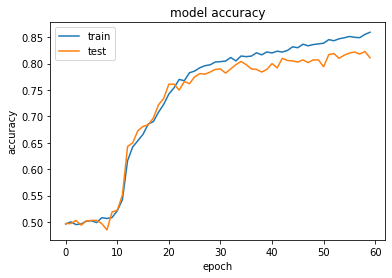

In [72]:
# Evaluating the model
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [73]:
# Evaluating on a given test set
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [74]:
pred_results

array([[2.2568745e-11, 2.0011206e-11, 2.0796698e-11, ..., 2.1319703e-11,
        2.1952287e-11, 2.7488893e-11],
       [7.1740086e-14, 6.6712417e-14, 6.3627570e-14, ..., 7.3051706e-14,
        7.3089619e-14, 8.1011695e-14],
       [1.3912289e-12, 1.3865691e-12, 1.3527608e-12, ..., 1.6256026e-12,
        1.6091511e-12, 1.4580622e-12],
       ...,
       [1.2451264e-13, 1.2105295e-13, 1.1891463e-13, ..., 1.2978813e-13,
        1.3739982e-13, 1.3465851e-13],
       [8.5357800e-13, 8.4352252e-13, 8.7352673e-13, ..., 1.0099802e-12,
        1.0593914e-12, 8.5554372e-13],
       [7.7727920e-12, 7.1748497e-12, 8.5685027e-12, ..., 9.2516576e-12,
        9.5441354e-12, 7.9382612e-12]], dtype=float32)

In [76]:
# Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[1][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9997552
